In [1]:
# libraries
import math, time, random, datetime

# data manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_column', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# missingno
import missingno

#warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
home_loan_train = pd.read_csv('home_loan/datasets/train.csv')
home_loan_test = pd.read_csv('home_loan/datasets/test.csv')
home_loan_sub = pd.read_csv('home_loan/datasets/sample_submission.csv')

In [3]:
home_loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
home_loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
home_loan_sub.head()

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,0
4,LP001051,0


In [6]:
home_loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
home_loan_train.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002619,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


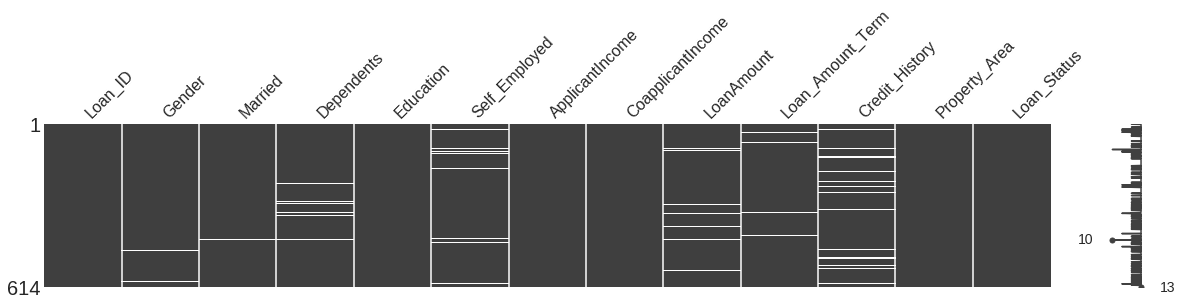

In [9]:
missingno.matrix(home_loan_train, figsize=(20,3))

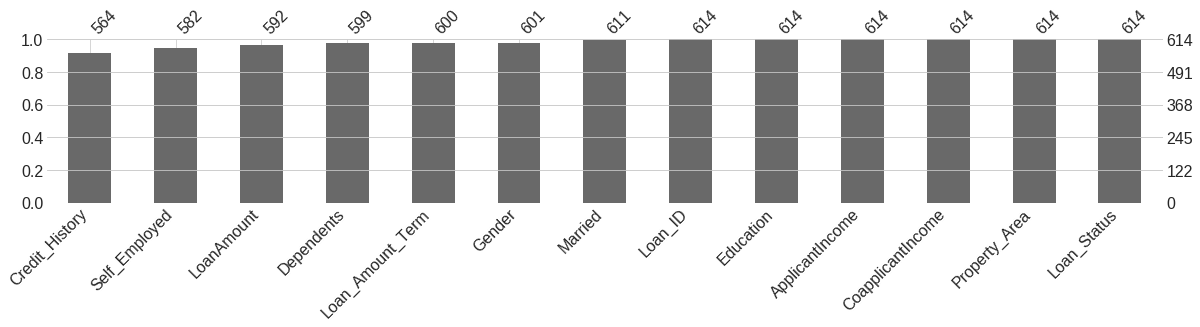

In [10]:
missingno.bar(home_loan_train, sort = 'ascending', figsize = (20,3) )

In [12]:
home_loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
home_loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
# to perform our data analysis let's create new dataframe
dataset_bin = pd.DataFrame() # contain discretised continuous
dataset_con = pd.DataFrame() # contain continuous variable

# Feature Loan_Status
discription: Loan approved 
key: Y/N 

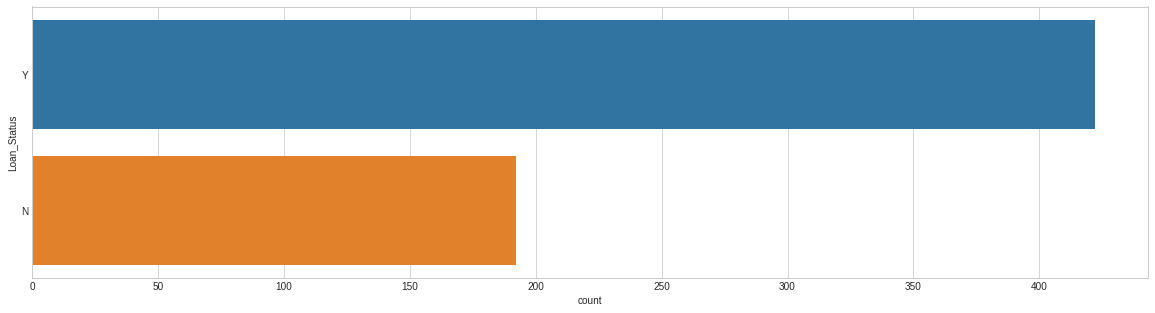

In [15]:
fig = plt.figure(figsize = (20,5))
sns.countplot(y='Loan_Status', data = home_loan_train)

In [16]:
home_loan_train.loc[home_loan_train['Loan_Status'] == 'Y', 'Loan_Status'] = 1
home_loan_train.loc[home_loan_train['Loan_Status'] == 'N', 'Loan_Status'] = 0

dataset_bin['Loan_Status'] = home_loan_train['Loan_Status']
dataset_con['Loan_Status'] = home_loan_train['Loan_Status']

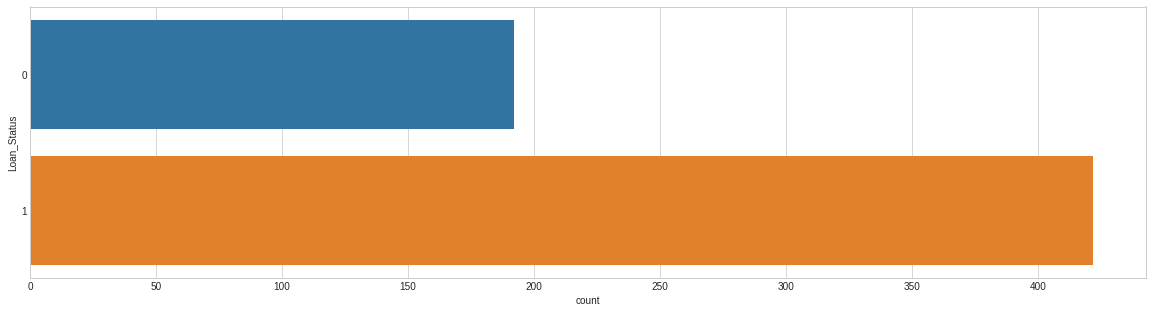

In [17]:
fig = plt.figure(figsize = (20,5))
sns.countplot(y = 'Loan_Status', data = dataset_bin)

# Feature Gender
Discription: Male/Female

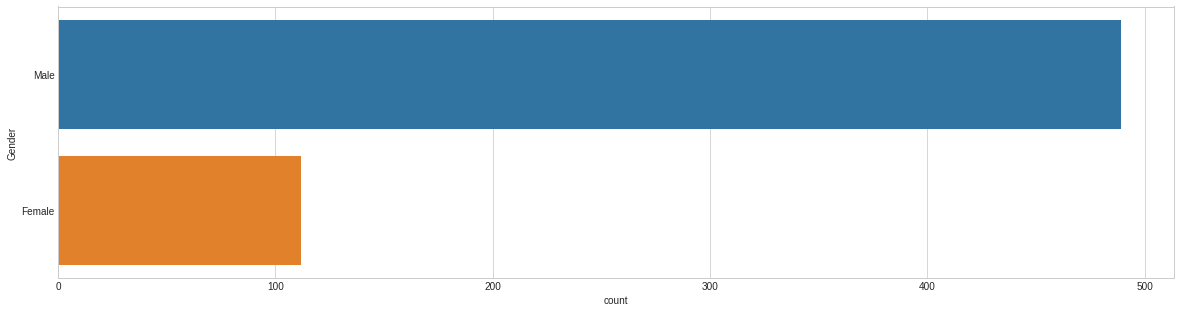

In [18]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y = 'Gender', data = home_loan_train)

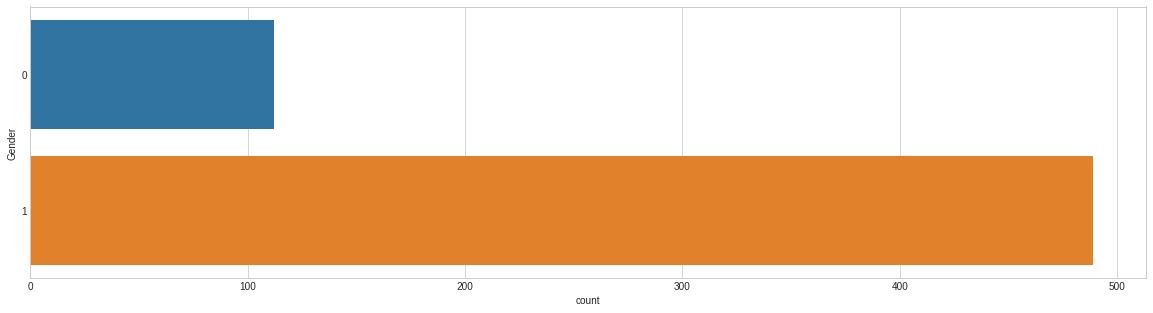

In [29]:
home_loan_train.loc[home_loan_train['Gender'] == 'Male', 'Gender'] = 1
home_loan_train.loc[home_loan_train['Gender'] == 'Female', 'Gender'] = 0

dataset_bin['Gender'] = home_loan_train['Gender']
dataset_con['Gender'] = home_loan_train['Gender']

fig = plt.figure(figsize = (20,5))
sns.countplot(y = "Gender", data = dataset_bin);

# Feature: Married
Discription: the Married(Y/N)

In [20]:
home_loan_train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [21]:
home_loan_train.Married.isnull().sum()

3

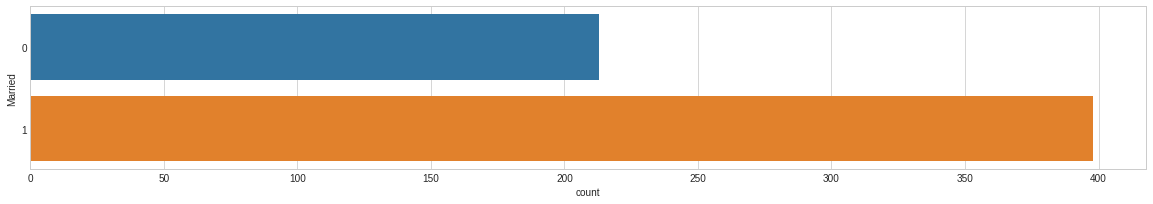

In [27]:
home_loan_train.loc[home_loan_train['Married'] == 'Yes', 'Married'] = 1
home_loan_train.loc[home_loan_train['Married'] == 'No', 'Married'] = 0

dataset_bin['Married'] = home_loan_train['Married']
dataset_con['Married'] = home_loan_train['Married']

fig = plt.figure(figsize = (20,3))
sns.countplot(y = "Married", data = dataset_bin);



# Feature Dependents
Discription: Number of dependents

In [23]:
home_loan_train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [24]:
home_loan_train.Dependents.isnull().sum()

15

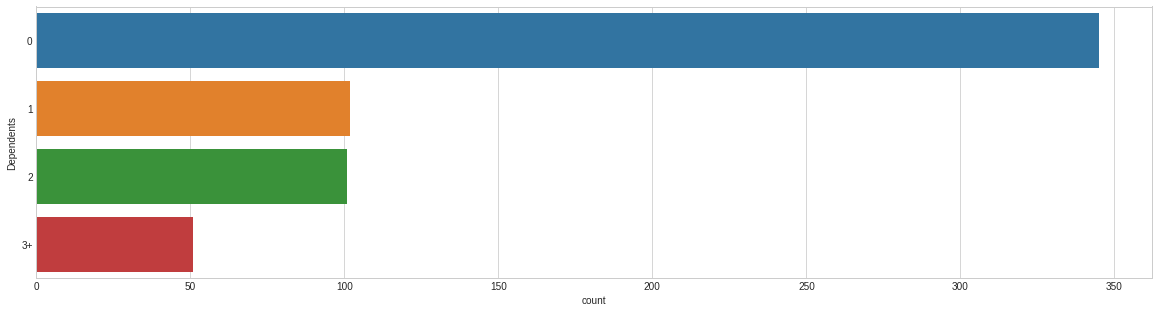

In [31]:
dataset_bin['Dependents'] = home_loan_train['Dependents']
dataset_con['Dependents'] = home_loan_train['Dependents']

fig = plt.figure(figsize = (20, 5))
sns.countplot(y = "Dependents", data = dataset_bin);

# Feature Education
Applicant Education (Graduate/ Under Graduate)

In [32]:
home_loan_train.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [33]:
home_loan_train.Education.isnull().sum()

0

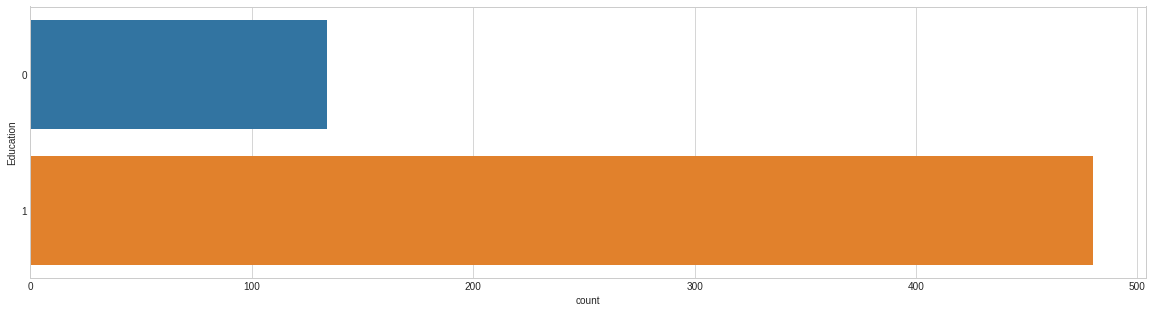

In [34]:
home_loan_train.loc[home_loan_train['Education'] == 'Graduate', "Education"] = 1
home_loan_train.loc[home_loan_train['Education'] == 'Not Graduate', "Education"] = 0

dataset_bin['Education'] = home_loan_train["Education"]
dataset_con['Education'] = home_loan_train["Education"]

fig = plt.figure(figsize = (20,5))
sns.countplot(y = "Education", data = dataset_bin);

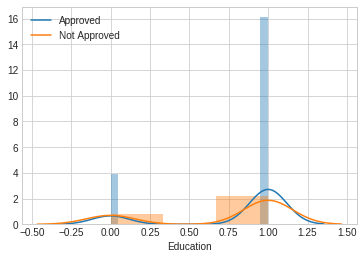

In [35]:
# compare Education to Loan_Status we can see this because they're binary
sns.distplot(dataset_bin.loc[dataset_bin['Loan_Status'] == 1]['Education'], kde_kws = {"label": "Approved"});
sns.distplot(dataset_bin.loc[dataset_bin['Loan_Status'] == 0]['Education'], kde_kws = {"label": "Not Approved"});

# Feature Self-Employed
Discription: the applicant self employment or not (Yes/NO)

In [37]:
home_loan_train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [38]:
home_loan_train.Self_Employed.isnull().sum()

32

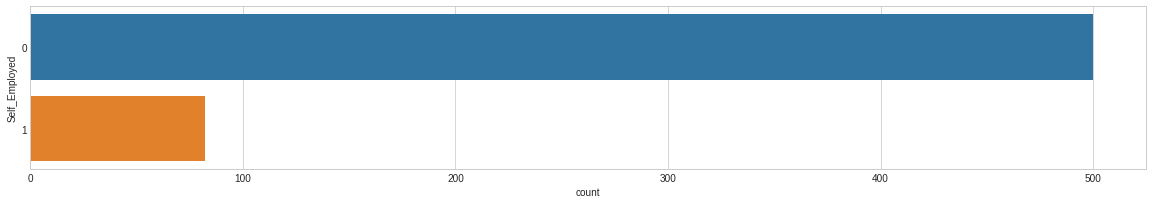

In [39]:
home_loan_train.loc[home_loan_train['Self_Employed'] == "Yes", 'Self_Employed'] = 1
home_loan_train.loc[home_loan_train['Self_Employed'] == "No", 'Self_Employed'] = 0

dataset_bin['Self_Employed'] = home_loan_train['Self_Employed']
dataset_con['Self_Employed'] = home_loan_train['Self_Employed']

fig = plt.figure(figsize = (20,3))
sns.countplot(y = "Self_Employed", data = dataset_bin);

# Feature Property_Area


In [40]:
home_loan_train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

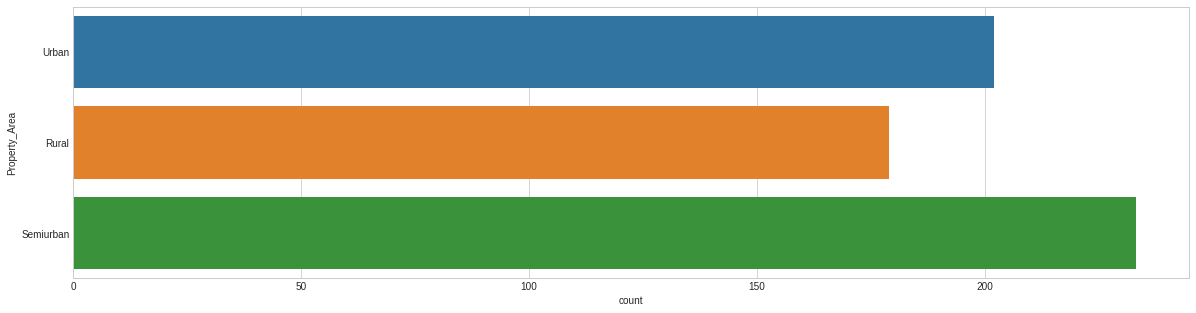

In [41]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y="Property_Area", data = home_loan_train);

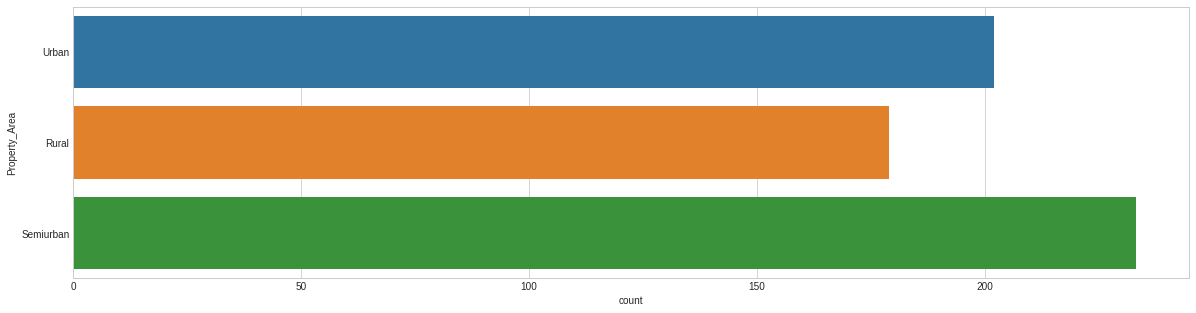

In [42]:
dataset_bin["Property_Area"] = home_loan_train["Property_Area"]
dataset_con["Property_Area"] = home_loan_train["Property_Area"]

fig = plt.figure(figsize = (20,5))
sns.countplot(y = "Property_Area", data = dataset_bin);

# Feature ApplicantIncome
Discription: the applicant income

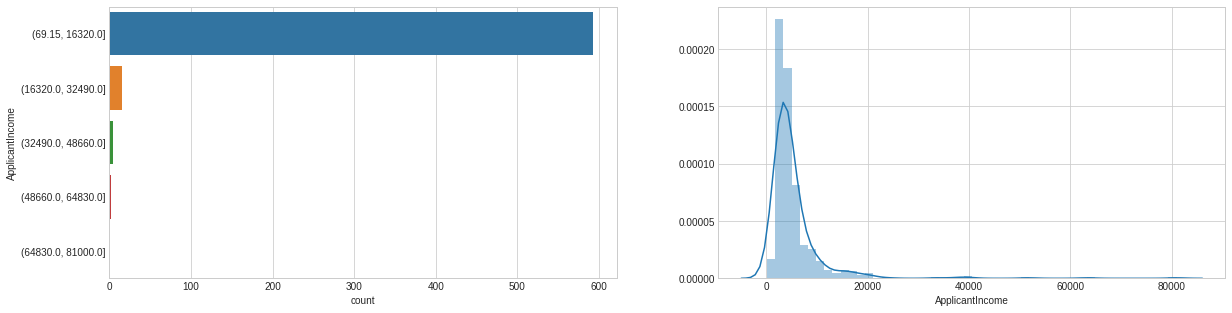

In [43]:
dataset_bin["ApplicantIncome"] = pd.cut(home_loan_train["ApplicantIncome"], 5)
dataset_con["ApplicantIncome"] = home_loan_train["ApplicantIncome"]

fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(y = "ApplicantIncome", data = dataset_bin);
plt.subplot(1,2,2)
sns.distplot(dataset_con["ApplicantIncome"]);

# Feature: CoapplicantIncome
Discription: the co applicant income

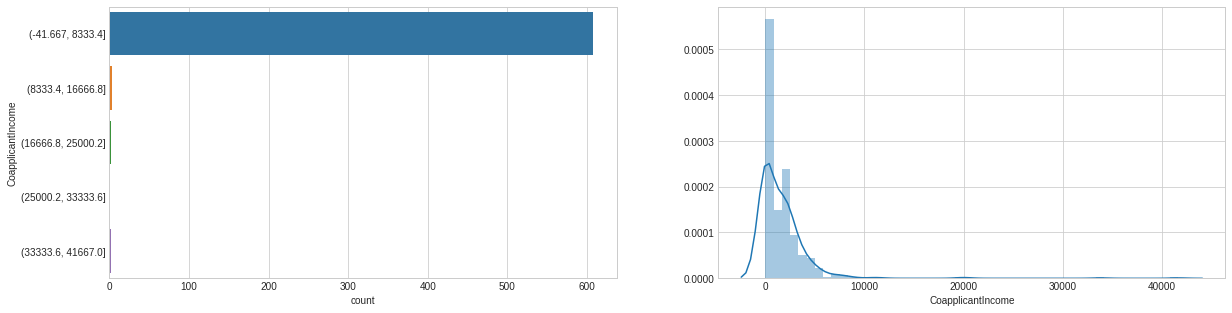

In [44]:
dataset_bin["CoapplicantIncome"] = pd.cut(home_loan_train["CoapplicantIncome"], 5)
dataset_con["CoapplicantIncome"] = home_loan_train["CoapplicantIncome"]

fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(y = "CoapplicantIncome", data = dataset_bin);
plt.subplot(1,2,2)
sns.distplot(dataset_con["CoapplicantIncome"]);

# Feature: LoanAmount
Discription: Loan Amount

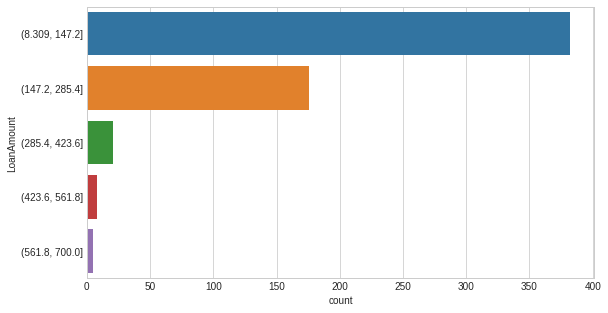

In [47]:
dataset_bin["LoanAmount"] = pd.cut(home_loan_train["LoanAmount"], 5)
dataset_con["LoanAmount"] = home_loan_train["LoanAmount"]

fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(y = "LoanAmount", data = dataset_bin);


# Feature : Loan_Amount_Term

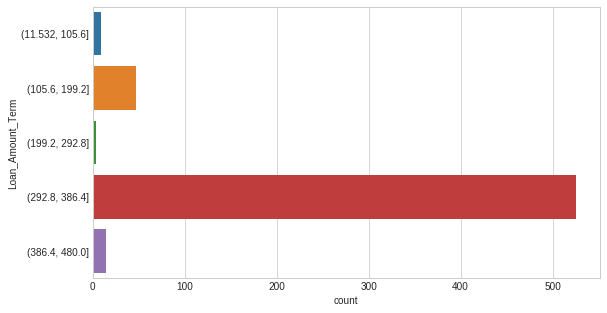

In [48]:
dataset_bin["Loan_Amount_Term"] = pd.cut(home_loan_train["Loan_Amount_Term"], 5)
dataset_con["Loan_Amount_Term"] = home_loan_train["Loan_Amount_Term"]

fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(y = "Loan_Amount_Term", data = dataset_bin);

# Feature: Credit_History

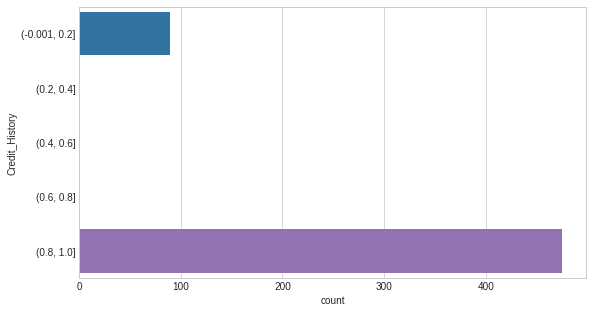

In [49]:
dataset_bin["Credit_History"] = pd.cut(home_loan_train["Credit_History"], 5)
dataset_con["Credit_History"] = home_loan_train["Credit_History"]

fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(y = "Credit_History", data = dataset_bin);